## MIE 1624 Assignment 2
### Import necessary libraries


In [359]:
import pandas as pd
import numpy as np
import math

### Load the Data

In [360]:
data = pd.read_csv("income-testing.csv")
data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


# Step 1: Data Cleaning

### Are there any missing data?

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null object
EducationLvl     12211 non-null int64
MaritalStatus    12211 non-null object
Occupation       11521 non-null object
Relationship     12211 non-null object
Race             12211 non-null object
Sex              12211 non-null object
CapitalGain      12211 non-null int64
CapitalLoss      12211 non-null int64
HoursPerWeek     12211 non-null int64
NativeCountry    11986 non-null object
IncomeBracket    12211 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


### We can tell we have missing data in WorkClass, Occupation and NativeCountry columns.
### Since WorkClass and Occupation are closely related to income, I decide to remove the null values instead of filling them with incorrect data

In [362]:
data = data.dropna(subset=['WorkClass','Occupation'],how = 'any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 15 columns):
Age              11521 non-null int64
WorkClass        11521 non-null object
FinalWeight      11521 non-null int64
Education        11521 non-null object
EducationLvl     11521 non-null int64
MaritalStatus    11521 non-null object
Occupation       11521 non-null object
Relationship     11521 non-null object
Race             11521 non-null object
Sex              11521 non-null object
CapitalGain      11521 non-null int64
CapitalLoss      11521 non-null int64
HoursPerWeek     11521 non-null int64
NativeCountry    11307 non-null object
IncomeBracket    11521 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


### Since NativeCountry is not considered closely related to income, I decided to fill the empty value with the highest occurance value in NativeCountry

In [363]:
data['NativeCountry'].value_counts()

United-States                 10380
Mexico                          198
Philippines                      65
Germany                          56
Canada                           43
Puerto-Rico                      42
India                            33
Cuba                             32
England                          31
El-Salvador                      29
China                            29
Italy                            29
Dominican-Republic               28
Jamaica                          27
Guatemala                        26
Nicaragua                        19
South                            19
Portugal                         18
Haiti                            17
Japan                            17
Columbia                         16
Vietnam                          16
Iran                             13
Peru                             12
Ecuador                          11
Poland                           11
Taiwan                           11
Greece                      

In [364]:
data['NativeCountry'].fillna(value='United-States',inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 15 columns):
Age              11521 non-null int64
WorkClass        11521 non-null object
FinalWeight      11521 non-null int64
Education        11521 non-null object
EducationLvl     11521 non-null int64
MaritalStatus    11521 non-null object
Occupation       11521 non-null object
Relationship     11521 non-null object
Race             11521 non-null object
Sex              11521 non-null object
CapitalGain      11521 non-null int64
CapitalLoss      11521 non-null int64
HoursPerWeek     11521 non-null int64
NativeCountry    11521 non-null object
IncomeBracket    11521 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


### Convert categorical data to numerical data

### Convert Education Column from lowest level to highest level with numerical values 0 to 15

    Preschool:      0 
    1st-4th:        1
    5th-6th:        2
    7th-8th:        3
    9th:            4
    10th:           5
    11th:           6
    12th:           7
    HS-grad:        8
    Some-college:   9
    Assoc-voc:      10
    Assoc-acdm:     11
    Bachelors:      12
    Masters:        13
    Prof-school:    14
    Doctorate:      15

In [365]:
data['Education'] = data['Education'].str.replace('Preschool', '0')
data['Education'] = data['Education'].str.replace('1st-4th', '1')
data['Education'] = data['Education'].str.replace('5th-6th', '2')
data['Education'] = data['Education'].str.replace('7th-8th', '3')
data['Education'] = data['Education'].str.replace('9th', '4')
data['Education'] = data['Education'].str.replace('10th', '5')
data['Education'] = data['Education'].str.replace('11th', '6')
data['Education'] = data['Education'].str.replace('12th', '7')
data['Education'] = data['Education'].str.replace('HS-grad', '8')
data['Education'] = data['Education'].str.replace('Some-college', '9')
data['Education'] = data['Education'].str.replace('Assoc-voc', '10')
data['Education'] = data['Education'].str.replace('Assoc-acdm', '11')
data['Education'] = data['Education'].str.replace('Bachelors', '12')
data['Education'] = data['Education'].str.replace('Masters', '13')
data['Education'] = data['Education'].str.replace('Prof-school', '14')
data['Education'] = data['Education'].str.replace('Doctorate', '15')
data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,9,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,12,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,12,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,12,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,8,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


### The rest of the catgorical data cannot be continuous ranked since a sales occupation does not have “4X” more weight in our calculation than the tech-support. Thus, I will use get_dummies function later on to get binary data points.

### Convert the IncomeBracket to 1,2,3 where each represents less than 50k, 50-100k and more than 100k

In [366]:
data['IncomeBracket'] = data['IncomeBracket'].str.replace('<50K', '1')
data['IncomeBracket'] = data['IncomeBracket'].str.replace('50-100K', '2')
data['IncomeBracket'] = data['IncomeBracket'].str.replace('>100K', '3')

In [367]:
pd.value_counts(data['NativeCountry'])

United-States                 10594
Mexico                          198
Philippines                      65
Germany                          56
Canada                           43
Puerto-Rico                      42
India                            33
Cuba                             32
England                          31
El-Salvador                      29
China                            29
Italy                            29
Dominican-Republic               28
Jamaica                          27
Guatemala                        26
Nicaragua                        19
South                            19
Portugal                         18
Haiti                            17
Japan                            17
Columbia                         16
Vietnam                          16
Iran                             13
Peru                             12
Ecuador                          11
Poland                           11
Taiwan                           11
Greece                      

There are many NativeCountry values and it wouldn't be a good idea to use get_dummies function since that would result in too many columns. I found out that the countries are almost all United-States, so I decided to use binary data, 1 for United-States and 0 for others.
### Converting United States to 1 and other to 0

In [368]:
data["NativeCountry"] = np.where(data["NativeCountry"].str.contains("United-States"), 1, 0)

In [369]:
data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,9,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,1,2
1,35,Private,341643,12,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,1,1
2,26,Private,40915,12,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,1,1
3,27,Federal-gov,257124,12,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,1,1
4,21,Private,256278,8,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,0,1


 # Step 2) Data Exploration

### Check correlation between continuous features, which are Age, FinalWeight, Education, EducationLvl, CapitalGain, CapitalLoss and HoursPerWeek

In [370]:
corrDF = data.loc[:,("Age","FinalWeight","Education","EducationLvl","CapitalGain","CapitalLoss","HoursPerWeek","IncomeBracket")]
corrDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 8 columns):
Age              11521 non-null int64
FinalWeight      11521 non-null int64
Education        11521 non-null object
EducationLvl     11521 non-null int64
CapitalGain      11521 non-null int64
CapitalLoss      11521 non-null int64
HoursPerWeek     11521 non-null int64
IncomeBracket    11521 non-null object
dtypes: int64(6), object(2)
memory usage: 810.1+ KB


In [371]:
corrDF['Education']=corrDF['Education'].astype(int)
corrDF['IncomeBracket']=corrDF['IncomeBracket'].astype(int)

In [372]:
corrDF.corr()

,Age,FinalWeight,Education,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket
Age,1.000000,-0.072312,0.037492,0.037492,0.093979,0.050851,0.089963,0.226847
FinalWeight,-0.072312,1.000000,-0.035815,-0.035815,0.002784,-0.015769,-0.021877,-0.015717
Education,0.037492,-0.035815,1.000000,1.000000,0.122091,0.090433,0.142333,0.290924
EducationLvl,0.037492,-0.035815,1.000000,1.000000,0.122091,0.090433,0.142333,0.290924
CapitalGain,0.093979,0.002784,0.122091,0.122091,1.000000,-0.033391,0.072879,0.201353
CapitalLoss,0.050851,-0.015769,0.090433,0.090433,-0.033391,1.000000,0.052120,0.148745
HoursPerWeek,0.089963,-0.021877,0.142333,0.142333,0.072879,0.052120,1.000000,0.199912
IncomeBracket,0.226847,-0.015717,0.290924,0.290924,0.201353,0.148745,0.199912,1.000000


In [373]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

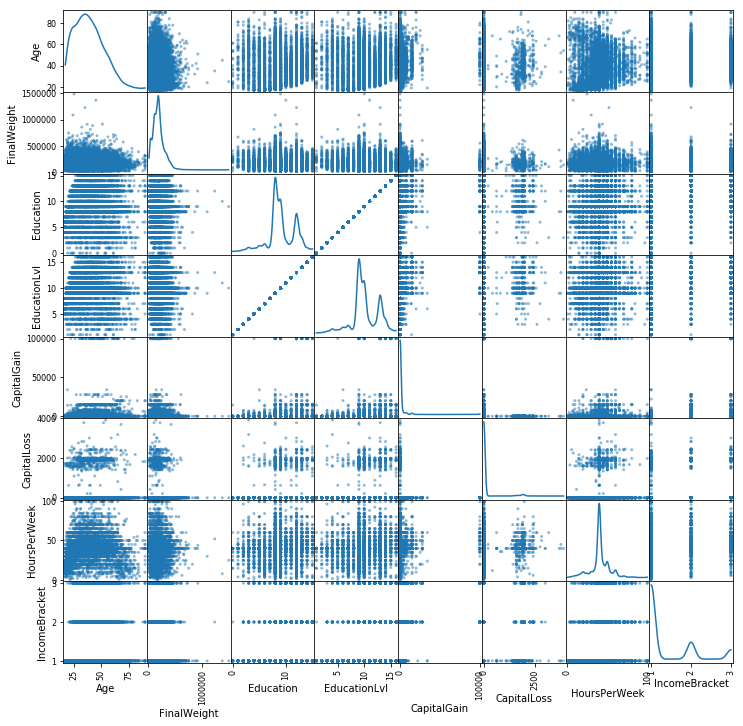

In [374]:
scatter_matrix(corrDF,figsize=(12, 12),diagonal='kde')  
plt.show()

We can tell from the correlation data and correlation graph, Education and EducationLvl are identical with correlation value of 1, thus we remove the redundant feature. FinalWeight and CapitalLoss have very low correlation to income, thus considered as unnecessary feature and will be dropped. Also, the top highest correlation with income are Education Level, Age, Capital Gain and HoursPerWeek, which will further explore in later section.

### Drop Redundant Features 

In [375]:
cleanData = data.drop(['Education','FinalWeight','CapitalLoss'], axis=1)
cleanData.head()

,Age,WorkClass,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,10,Married-civ-spouse,Sales,Wife,White,Female,0,25,1,2
1,35,Private,13,Never-married,Other-service,Other-relative,White,Male,0,50,1,1
2,26,Private,13,Never-married,Other-service,Not-in-family,White,Female,0,25,1,1
3,27,Federal-gov,13,Never-married,Transport-moving,Other-relative,White,Male,0,35,1,1
4,21,Private,9,Never-married,Other-service,Other-relative,Other,Female,0,35,0,1


## Income Distribution in Age 

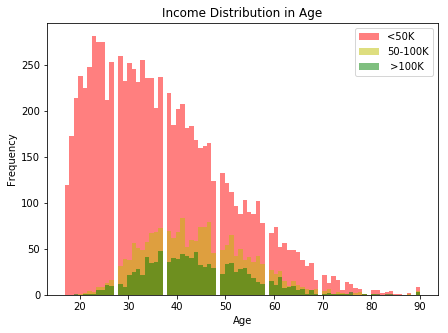

In [381]:
a = cleanData['Age'][cleanData['IncomeBracket'] == '1']
b = cleanData['Age'][cleanData['IncomeBracket'] == '2']
c = cleanData['Age'][cleanData['IncomeBracket'] == '3']

new = pd.concat([a,b,c], axis = 1, keys=['<50K', '50-100K',' >100K'])
new.plot(kind='hist', color = ['r', 'y','g'], bins = 80, figsize = (7,5), alpha = 0.5)
plt.title('Income Distribution in Age')
plt.xlabel('Age')
plt.show()

We can tell from the graph, one's income grows with age and also a decrease in income after retirement at age 66.

## Income Distribution vs Education

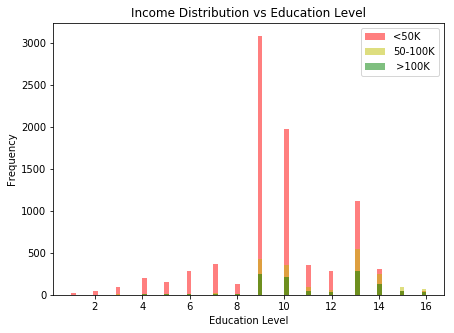

In [377]:
a = cleanData['EducationLvl'][cleanData['IncomeBracket'] == '1']
b = cleanData['EducationLvl'][cleanData['IncomeBracket'] == '2']
c = cleanData['EducationLvl'][cleanData['IncomeBracket'] == '3']

new = pd.concat([a,b,c], axis = 1, keys=['<50K', '50-100K',' >100K'])
new.plot(kind='hist', color = ['r', 'y','g'], bins = 80, figsize = (7,5), alpha = 0.5)
plt.title('Income Distribution vs Education Level')
plt.xlabel('Education Level')
plt.show()

We can tell from the graph that there's a higher ratio of people earning more than 50K with higher education. Most people have education level higher than 8, which is High School in this example.

## Income Distribution in Capital Gain

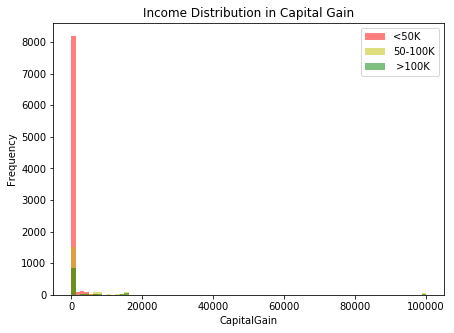

In [380]:
a = cleanData['CapitalGain'][cleanData['IncomeBracket'] == '1']
b = cleanData['CapitalGain'][cleanData['IncomeBracket'] == '2']
c = cleanData['CapitalGain'][cleanData['IncomeBracket'] == '3']

new = pd.concat([a,b,c], axis = 1, keys=['<50K', '50-100K',' >100K'])
new.plot(kind='hist', color = ['r', 'y','g'], bins = 80, figsize = (7,5), alpha = 0.5)
plt.title('Income Distribution in Capital Gain')
plt.xlabel('CapitalGain')
plt.show()

Large Capital Gain has higher income, however data is heavily focused on the 0-10000 range, thus not a very good prediction

## Income Distribution in Working Hours Per Week

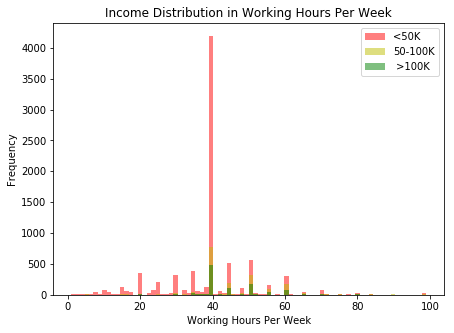

In [379]:
a = cleanData['HoursPerWeek'][cleanData['IncomeBracket'] == '1']
b = cleanData['HoursPerWeek'][cleanData['IncomeBracket'] == '2']
c = cleanData['HoursPerWeek'][cleanData['IncomeBracket'] == '3']

new = pd.concat([a,b,c], axis = 1, keys=['<50K', '50-100K',' >100K'])
new.plot(kind='hist', color = ['r', 'y','g'], bins = 80, figsize = (7,5), alpha = 0.5)
plt.title('Income Distribution in Working Hours Per Week')
plt.xlabel('Working Hours Per Week')
plt.show()

Most people work 40 hours per week, people working more than 40 hours tend to have higher income 

## Income Distribution in Marital Status

In [382]:
def plotData(column):
    
    a = data[column][data['IncomeBracket'] == '1'].value_counts()
    b = data[column][data['IncomeBracket'] == '2'].value_counts()
    c = data[column][data['IncomeBracket'] == '3'].value_counts()
  
    new = pd.concat([a,b,c], axis = 1, keys=['<50K', '50-100K','>100K'])
    new.plot(kind='barh', stacked= True, color = ['r', 'y','g'], figsize = (7,5))


In [383]:
def ratioData(column):
    a = data[column][data['IncomeBracket'] == '1'].value_counts()
    b = data[column][data['IncomeBracket'] == '2'].value_counts()
    c = data[column][data['IncomeBracket'] == '3'].value_counts()
    new = pd.concat([a,b,c], axis = 1, keys=['<50K', '50-100K','>100K'])

    for index in new.index:
        asum = float(new['<50K'][index])
        bsum = float(new['50-100K'][index])
        csum = float(new['>100K'][index])
        tsum = asum+bsum+csum
        if math.isnan(asum) == True:
            asum = 0
        aratio = round(asum/tsum, 2)
        bratio = round(bsum/tsum, 2)
        cratio = round(csum/tsum, 2)
        print (index + ' <50K: '+ str(aratio))
        print (index + ' 50-100K: '+ str(bratio))
        print (index + ' 100K: '+ str(cratio))


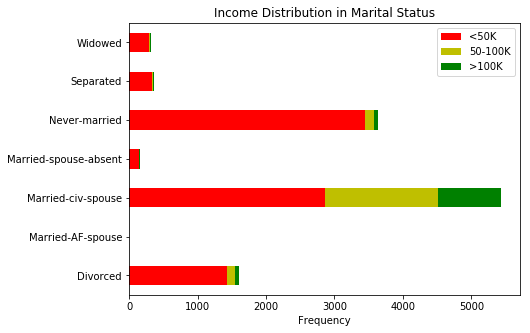

In [384]:
plotData('MaritalStatus')
plt.title('Income Distribution in Marital Status')
plt.xlabel('Frequency')
plt.show()

#### Ratio representation of how income is distriputed within each category

In [385]:
ratioData('MaritalStatus')

Divorced <50K: 0.89
Divorced 50-100K: 0.08
Divorced 100K: 0.04
Married-AF-spouse <50K: nan
Married-AF-spouse 50-100K: nan
Married-AF-spouse 100K: nan
Married-civ-spouse <50K: 0.53
Married-civ-spouse 50-100K: 0.3
Married-civ-spouse 100K: 0.17
Married-spouse-absent <50K: 0.92
Married-spouse-absent 50-100K: 0.06
Married-spouse-absent 100K: 0.02
Never-married <50K: 0.95
Never-married 50-100K: 0.03
Never-married 100K: 0.02
Separated <50K: 0.93
Separated 50-100K: 0.05
Separated 100K: 0.03
Widowed <50K: 0.9
Widowed 50-100K: 0.05
Widowed 100K: 0.05


We can tell from the graph and ratio that people in a relationship have higher income than single people. 

## Income Distribution in Work Class

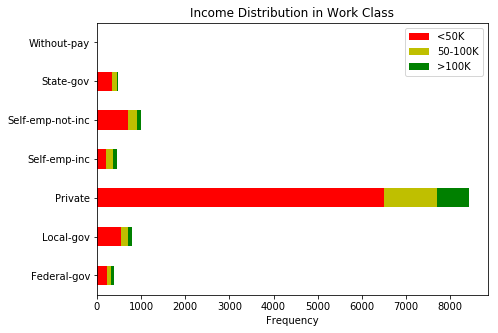

In [386]:
plotData('WorkClass')
plt.title('Income Distribution in Work Class')
plt.xlabel('Frequency')
plt.show()

In [387]:
ratioData('WorkClass')

Federal-gov <50K: 0.61
Federal-gov 50-100K: 0.24
Federal-gov 100K: 0.15
Local-gov <50K: 0.68
Local-gov 50-100K: 0.21
Local-gov 100K: 0.11
Private <50K: 0.77
Private 50-100K: 0.14
Private 100K: 0.09
Self-emp-inc <50K: 0.44
Self-emp-inc 50-100K: 0.38
Self-emp-inc 100K: 0.18
Self-emp-not-inc <50K: 0.71
Self-emp-not-inc 50-100K: 0.21
Self-emp-not-inc 100K: 0.09
State-gov <50K: 0.72
State-gov 50-100K: 0.19
State-gov 100K: 0.08
Without-pay <50K: nan
Without-pay 50-100K: nan
Without-pay 100K: nan


From the graph and ratio, we can see that most people work in a private company, however there's a higher ratio of high income in self employment category.

## Income Distribution in Relationship

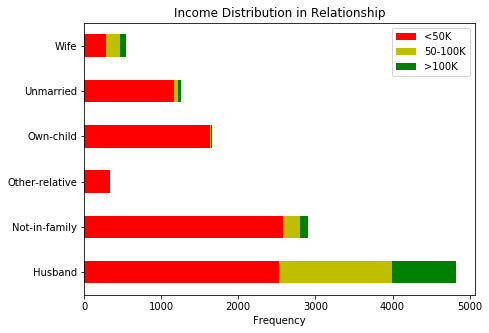

In [388]:
plotData('Relationship')
plt.title('Income Distribution in Relationship')
plt.xlabel('Frequency')
plt.show()

In [389]:
ratioData('Relationship')

Husband <50K: 0.53
Husband 50-100K: 0.3
Husband 100K: 0.17
Not-in-family <50K: 0.89
Not-in-family 50-100K: 0.08
Not-in-family 100K: 0.04
Other-relative <50K: 0.98
Other-relative 50-100K: 0.02
Other-relative 100K: 0.01
Own-child <50K: 0.98
Own-child 50-100K: 0.01
Own-child 100K: 0.01
Unmarried <50K: 0.93
Unmarried 50-100K: 0.04
Unmarried 100K: 0.03
Wife <50K: 0.51
Wife 50-100K: 0.34
Wife 100K: 0.16


From the graph and ratio we can see that husband and wife have higher income ratio that other groups. This follows the same pattern with income and marital status relationship where people in a relationship have higher income.

# Step 3) Feature Selection
Feature engineering is important for creating a high accuracy model. Including a redundant feature in the model will hurt the accuracy since our model may double count how important that feature is. It is a good idea to include informative and simple features in our model to produce higher accuracy.

In [390]:
cleanData['EducationLvl']=cleanData['EducationLvl'].astype(int)
cleanData['IncomeBracket']=cleanData['IncomeBracket'].astype(int)
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 12 columns):
Age              11521 non-null int64
WorkClass        11521 non-null object
EducationLvl     11521 non-null int32
MaritalStatus    11521 non-null object
Occupation       11521 non-null object
Relationship     11521 non-null object
Race             11521 non-null object
Sex              11521 non-null object
CapitalGain      11521 non-null int64
HoursPerWeek     11521 non-null int64
NativeCountry    11521 non-null int32
IncomeBracket    11521 non-null int32
dtypes: int32(3), int64(3), object(6)
memory usage: 1.3+ MB


## New Feature: Person
Seperate Age into four categories by combining age and sex, younger than 18(Child), 18 to 66 years old men(Male), 18 to 66 years old women(Female)and above 66 years old(Retired). The reson behind this is for United-States, legal working age is 18 years old and the normal retirement age is 66 years old. Reference from United States Goverment website. https://www.dol.gov/general/topic/youthlabor/agerequirements. 

In [31]:
def get_person(passenger):
    age,sex = passenger
    return 'Child' if age < 18 else sex
    return 'Retired' if age > 66 else sex
    
data['Person'] = data[['Age','Sex']].apply(get_person,axis=1)
data['Person'] = data[['Age','Sex']].apply(get_person,axis=1)
data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Person
0,57,Self-emp-not-inc,152030,9,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,1,2,Female
1,35,Private,341643,12,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,1,1,Male
2,26,Private,40915,12,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,1,1,Female
3,27,Federal-gov,257124,12,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,1,1,Male
4,21,Private,256278,8,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,0,1,Female


## New Feature: MaritalStatus
As we found from data exploration session,  people in a relationship tends to have higher income than poeple not in a relationship. Thus, a new feature called MaritalStatus which has values of single or married that will replace MaritalStatus and Relationship features.

In [32]:
data["MaritalStatus"] = np.where(data["MaritalStatus"].str.contains("Married-civ-spouse"), 1, 0)

## Remove the redundant features

In [33]:
data.drop(['Relationship','Age','Education','FinalWeight','Sex','CapitalLoss'],axis=1,inplace = True)
data.head()

,WorkClass,EducationLvl,MaritalStatus,Occupation,Race,CapitalGain,HoursPerWeek,NativeCountry,IncomeBracket,Person
0,Self-emp-not-inc,10,1,Sales,White,0,25,1,2,Female
1,Private,13,0,Other-service,White,0,50,1,1,Male
2,Private,13,0,Other-service,White,0,25,1,1,Female
3,Federal-gov,13,0,Transport-moving,White,0,35,1,1,Male
4,Private,9,0,Other-service,Other,0,35,0,1,Female


## Perform get_dummies function to seperate the categorical data

In [34]:
dummies_work = pd.get_dummies(data['WorkClass'],prefix='Work')
dummies_occu = pd.get_dummies(data['Occupation'],prefix='Occu')
dummies_race = pd.get_dummies(data['Race'],prefix='Race')
dummies_person = pd.get_dummies(data['Person'],prefix='Person')

dummies_data = pd.concat([data, dummies_work, dummies_occu, dummies_race, dummies_person], axis=1)
dummies_data = dummies_data.drop(['WorkClass','Occupation','Race', 'Person'], axis=1)
dummies_data.head()

,EducationLvl,MaritalStatus,CapitalGain,HoursPerWeek,NativeCountry,IncomeBracket,Work_Federal-gov,Work_Local-gov,Work_Private,Work_Self-emp-inc,...,Occu_Tech-support,Occu_Transport-moving,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Person_Child,Person_Female,Person_Male
0,10,1,0,25,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,13,0,0,50,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,13,0,0,25,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,13,0,0,35,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,9,0,0,35,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


## Perform PCA to reduce dimensionality

In [35]:
pca_data = dummies_data.drop(['IncomeBracket'],axis=1)

In [36]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [37]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(pca_data)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(pca_data)

In [38]:
pca = PCA(.90)

In [39]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
train_img_data = pca.transform(train_img)

In [41]:
train_img_data.shape

(11521, 25)

In [42]:
reducedDF=pd.DataFrame(np.concatenate([train_img_data], axis=1))
reducedDF

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.274914,1.386993,-1.057588,2.086938,2.389143,-0.025827,-0.477696,-1.012839,-0.075918,1.864246,...,-0.211194,-0.471946,-0.291408,-0.087285,0.857487,-0.266715,-0.769640,-0.926587,2.229310,-0.460703
1,0.041191,-0.506431,-0.499184,-0.155270,-0.097205,0.495062,-0.868641,0.003610,0.417515,-1.385903,...,-0.447797,0.395960,0.214348,-0.473511,0.356808,0.749535,0.200704,-0.940487,-1.477498,-0.257560
2,2.582174,0.327457,-1.415513,0.262370,0.251042,0.750645,-0.856692,0.093693,0.391165,-1.435312,...,-0.428367,0.265227,0.242011,-0.320647,0.177075,0.739644,-0.076838,-0.905282,-0.541456,-0.471257
3,-1.046828,1.032367,0.727865,0.707726,-1.450080,-1.586499,1.738565,0.926823,1.205303,0.796734,...,-0.067102,-0.199423,0.119600,0.505785,-0.598179,-1.320204,-1.741377,-2.405083,-0.098901,1.522570
4,3.821263,-1.140727,3.140338,-0.625660,2.295743,3.395341,0.885794,1.430479,-1.995133,0.022305,...,1.227456,-3.291360,7.075533,-5.343594,-0.170466,0.894851,-0.118841,-1.124441,-0.390004,-0.037821
5,-1.778915,-1.540837,-0.139842,-0.104747,-0.644679,-0.288110,0.746821,-0.407993,0.381072,-0.173796,...,0.284364,-0.049788,0.019522,-0.121964,0.060971,0.276268,0.124605,0.503657,-0.393274,0.949887
6,-0.370932,0.635660,2.966060,-3.291040,0.834707,2.738584,0.280294,-0.862895,1.062617,0.547749,...,-1.035189,1.464398,-1.309328,0.720569,0.426360,-0.789855,0.526657,0.746274,-0.411710,-0.121880
7,1.386350,1.735314,-1.583699,-1.366727,-0.291723,1.061826,-0.206938,-1.560355,0.066400,-0.101466,...,0.153146,-0.034815,0.034221,0.024241,0.050978,0.058217,-0.169165,0.204079,-0.548611,0.972746
8,-0.530486,-1.554558,-0.205267,0.107185,-1.113066,-0.436667,-0.159079,-0.256510,-1.130695,0.099721,...,-0.223088,-0.057591,0.086437,0.642212,-0.291994,-0.068770,-0.207645,0.112797,0.639911,0.698070
9,-1.030999,2.160484,1.054384,2.241612,-3.093883,1.324009,-0.677114,2.239654,-0.731380,0.195910,...,-0.580652,-1.637477,0.596319,0.972894,2.029704,0.602561,2.550884,-0.977215,-0.690122,1.839957


# Step 4) Model Implementation and Model Tuning

## Split the data into training data and testing data

In [227]:
X = reducedDF
y = dummies_data.IncomeBracket
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

## Logistic Regression Classification

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
try:
    from sklearn.model_selection import GridSearchCV
except:
    from sklearn.grid_search import GridSearchCV
try:
    from sklearn.model_selection import learning_curve
except:
    from sklearn.learning_curve import learning_curve

In [232]:
lg_fit = LogisticRegression(random_state=42, penalty='l1')

In [233]:
lg_fit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
predictions_lg_fit = lg_fit.predict(X_test)
print(accuracy_score(y_test, predictions_lg_fit))

0.775238646225


### Perform cross validation with 10 folds

In [236]:
from sklearn.cross_validation import KFold

def run_kfold(fcn):
    
    #run KFold with 10 folds instead of the default 3
    #on the 11521 records in the data
    kf = KFold(11521, n_folds=10)
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        fcn.fit(X_train, y_train)
        predictions = fcn.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    var_outcome = np.var(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    print("Variance : {0}".format(var_outcome)) 

run_kfold(lg_fit)

Fold 1 accuracy: 0.777103209019948
Fold 2 accuracy: 0.7743055555555556
Fold 3 accuracy: 0.765625
Fold 4 accuracy: 0.7838541666666666
Fold 5 accuracy: 0.7751736111111112
Fold 6 accuracy: 0.7829861111111112
Fold 7 accuracy: 0.7743055555555556
Fold 8 accuracy: 0.7803819444444444
Fold 9 accuracy: 0.7881944444444444
Fold 10 accuracy: 0.7743055555555556
Mean Accuracy: 0.7776235153464393
Variance : 3.7019561376946826e-05


#### From cross-validation where k = 10, we have Mean Accuracy with Logistic Regression of 77.8% with a variance of 3.70e-6

In [237]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

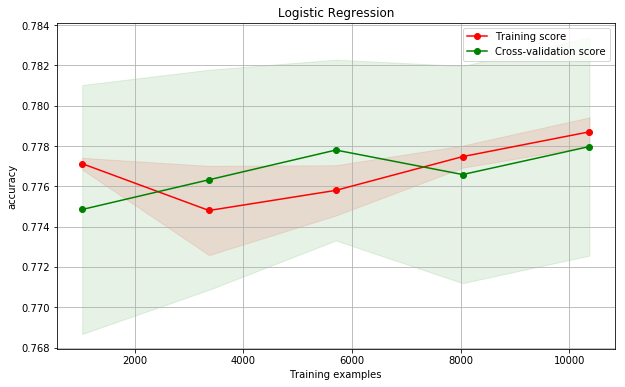

In [238]:
plot_learning_curve(lg_fit, 'Logistic Regression', X, y, cv=10);
plt.show()

## Hyperparameter Tuning for Logistic Regression

In [239]:
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C': np.linspace(0.01, 100, 25)}

# Use classification accuracy to compare parameter combinations
acc_scorer_lg = make_scorer(accuracy_score)

# Run a grid search for the Logistic Regression classifier and all the selected parameters
grid_obj_lg = GridSearchCV(lg, parameters, scoring=acc_scorer_lg)
grid_obj_lg = grid_obj_lg.fit(X_train, y_train)

# Set our classifier to have the best combination of parameters
lg = grid_obj_lg.best_estimator_

# Fit the selected classifier to the training data. 
lg.fit(X_train, y_train)

LogisticRegression(C=29.173750000000002, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [250]:
predictions_lg = lg.predict(X_test)
print(accuracy_score(y_test, predictions_lg))

0.775817182528


### Perform cross validation with 10 folds after optimization

In [274]:
run_kfold(lg)

Fold 1 accuracy: 0.7762359063313097
Fold 2 accuracy: 0.7743055555555556
Fold 3 accuracy: 0.765625
Fold 4 accuracy: 0.7855902777777778
Fold 5 accuracy: 0.7777777777777778
Fold 6 accuracy: 0.7829861111111112
Fold 7 accuracy: 0.7743055555555556
Fold 8 accuracy: 0.7795138888888888
Fold 9 accuracy: 0.7881944444444444
Fold 10 accuracy: 0.7743055555555556
Mean Accuracy: 0.7778840072997977
Variance : 3.858064282371574e-05


#### The optimal 'c' value we obtained through GridSearch is c=29.17 and the best accuracy we can get from that is 77.8% and variance of 3.8e^-5.
Logistic Regression is used to predict categorical target variables and frequently used to estimate the probability of an event. Pros are, if the noise ratio is relatively low, logistic regression works best. Cons, it only takes numerical values.

## Random Forest Classification

In [251]:
fit_clf = RandomForestClassifier()

In [252]:
fit_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [253]:
predictions_fit_clf = fit_clf.predict(X_test)
print(accuracy_score(y_test, predictions_fit_clf))

0.742262076945


### Perform cross validation with 10 folds

In [273]:
run_kfold(fit_clf)

Fold 1 accuracy: 0.7649609713790113
Fold 2 accuracy: 0.7465277777777778
Fold 3 accuracy: 0.7534722222222222
Fold 4 accuracy: 0.7734375
Fold 5 accuracy: 0.7560763888888888
Fold 6 accuracy: 0.7638888888888888
Fold 7 accuracy: 0.7361111111111112
Fold 8 accuracy: 0.7621527777777778
Fold 9 accuracy: 0.7413194444444444
Fold 10 accuracy: 0.7421875
Mean Accuracy: 0.7540134582490122
Variance : 0.00013429834337928874


#### From cross-validation where k = 10, we have Mean Accuracy with Random Forest Classification of 75.4% with a variance of 0.0001

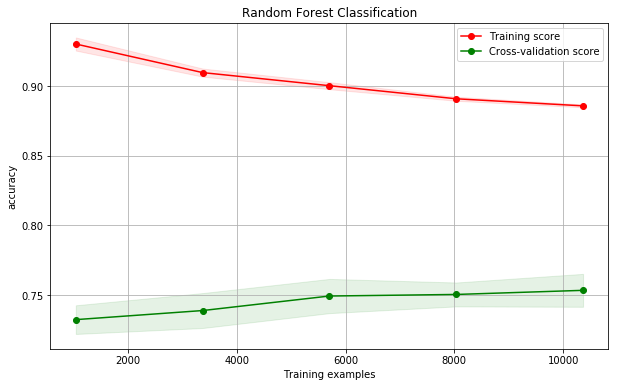

In [255]:
plot_learning_curve(fit_clf, 'Random Forest Classification', X, y, cv=10);
plt.show()

## Hyperparameter Tuning for Random Forest Classification

In [266]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [9,10,11],  
              'max_features': ['auto','log2'], 
              'criterion': ['gini','entropy'],
              'min_samples_split': [2],
             }

# make_scorer returns a callable object that scores an estimator’s output.
#We are using accuracy_score for comparing different parameter combinations. 
acc_scorer = make_scorer(accuracy_score)

# Run the grid search 
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set our classifier to the have the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the selected classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [267]:
predictions_clf = clf.predict(X_test)
print(accuracy_score(y_test, predictions_clf))

0.736765982065


### Perform cross validation with 10 folds after optimization

In [272]:
run_kfold(clf)

Fold 1 accuracy: 0.7684301821335646
Fold 2 accuracy: 0.75
Fold 3 accuracy: 0.7395833333333334
Fold 4 accuracy: 0.7699652777777778
Fold 5 accuracy: 0.7473958333333334
Fold 6 accuracy: 0.7543402777777778
Fold 7 accuracy: 0.7421875
Fold 8 accuracy: 0.7638888888888888
Fold 9 accuracy: 0.7526041666666666
Fold 10 accuracy: 0.7395833333333334
Mean Accuracy: 0.7527978793244676
Variance : 0.00011633543020279747


#### From Hyperparameter tuning, we have found the optimal parameters showed above which gives us accuracy of 76% and variance of 0.0001

### Bias-Variance Tradeoff for Random Forest Classification

In [258]:
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV

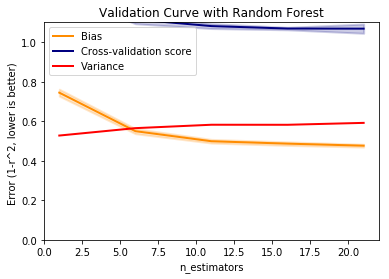

In [259]:
param_range = list(range(1,25, 5))
train_scores, test_scores = validation_curve(
    fit_clf, X, y, param_name="n_estimators", param_range=param_range,
    cv=4, scoring="r2", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Error (1-r^2, lower is better) ")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, 1-train_scores_mean, label="Bias",
             color="darkorange", lw=lw)
plt.fill_between(param_range, (1-train_scores_mean) - train_scores_std,
                 (1-train_scores_mean) + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, 1-test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, (1-test_scores_mean) - test_scores_std,
                 (1-test_scores_mean) + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, ((1-test_scores_mean)-(1-train_scores_mean)), label="Variance",
             color="red", lw=lw)
plt.legend(loc="best")
plt.show()

#### Random Forest Classification
It works as a large collection of uncorrelated decision trees. The pros for it  is it can be used for both regression and classification tasks. Another advantage of it is with enough trees the classifier won't overfit the model. The cons for it is that large number of trees may slow the algorithm and ineffective for read-time predictions.

# Decision Trees Classification

In [286]:
!pip install graphviz

In [287]:
import operator # for sorting dictionaries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

from graphviz import Source
from IPython.display import Image

In [288]:
tree = DecisionTreeClassifier(criterion='entropy')

In [289]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [290]:
y_pred = tree.predict(X_test)

In [291]:
accuracy_score(y_test, y_pred)

0.73300549609487997

#### Perform cross validation with 10 folds

In [292]:
run_kfold(tree)

Fold 1 accuracy: 0.751084128360798
Fold 2 accuracy: 0.7378472222222222
Fold 3 accuracy: 0.7326388888888888
Fold 4 accuracy: 0.7543402777777778
Fold 5 accuracy: 0.7404513888888888
Fold 6 accuracy: 0.7378472222222222
Fold 7 accuracy: 0.7378472222222222
Fold 8 accuracy: 0.7421875
Fold 9 accuracy: 0.7378472222222222
Fold 10 accuracy: 0.7144097222222222
Mean Accuracy: 0.7386500795027464
Variance : 0.00010428536051283602


#### From cross-validation where k = 10, we have Mean Accuracy with Decision Tree Classification of 74% with a variance of 0.0001

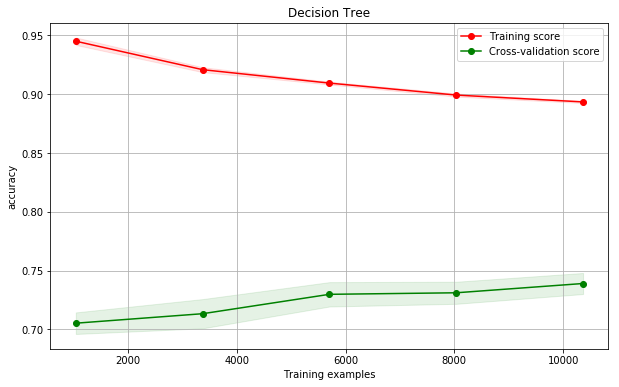

In [293]:
plot_learning_curve(tree, 'Decision Tree', X, y, cv=10);
plt.show()

## Hyperparameter Tuning for Decision Tree Classification

In [301]:
# Choose the type of classifier. 
tree_fit = DecisionTreeClassifier()

# Choose some parameter combinations to try
parameters = {'max_features': ['auto','log2',4,5,6], 
              'criterion': ['gini','entropy'],
              'min_samples_split': [2],
              'random_state' :[15,20,25]
             }

# make_scorer returns a callable object that scores an estimator’s output.
#We are using accuracy_score for comparing different parameter combinations. 
acc_scorer = make_scorer(accuracy_score)

# Run the grid search 
grid_obj = GridSearchCV(tree_fit, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set our classifier to the have the best combination of parameters
tree_fit = grid_obj.best_estimator_

# Fit the selected classifier to the training data
tree_fit.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=15, splitter='best')

In [302]:
y_pred = tree_fit.predict(X_test)
accuracy_score(y_test, y_pred)

0.72722013306334976

### Perform cross validation with 10 folds after optimization

In [305]:
run_kfold(tree_fit)

Fold 1 accuracy: 0.7346053772766695
Fold 2 accuracy: 0.7300347222222222
Fold 3 accuracy: 0.7248263888888888
Fold 4 accuracy: 0.7621527777777778
Fold 5 accuracy: 0.7421875
Fold 6 accuracy: 0.7482638888888888
Fold 7 accuracy: 0.7256944444444444
Fold 8 accuracy: 0.7465277777777778
Fold 9 accuracy: 0.7361111111111112
Fold 10 accuracy: 0.7204861111111112
Mean Accuracy: 0.737089009949889
Variance : 0.00014809072568648042


#### From Hyperparameter tuning, we have found the optimal parameters showed above which gives us accuracy of 74% and variance of 0.0001

#### Decision Trees:
Decision tree works by splitting the source set into subsets based on an attribute value test. Tree partitions samples into mutuallty exclusive groups by selecting the best spliiting attribute. Process is repeated until the stopping criteria is reached. Pros, works with both interval and categorical variables and no need to normalize the data. Cons, Decision trees can easily grow to a big size and have very high variance.

## Gradient Boosting Classification

In [307]:
from sklearn.ensemble import GradientBoostingClassifier

In [308]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [309]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [310]:
y_pred_gboost = gbc.predict(X_test.values)
accuracy_score(y_test, y_pred_gboost)

0.7665606016777553

#### Perform cross validation with 10 folds

In [311]:
run_kfold(gbc)

Fold 1 accuracy: 0.7745013009540329
Fold 2 accuracy: 0.7769097222222222
Fold 3 accuracy: 0.7673611111111112
Fold 4 accuracy: 0.7899305555555556
Fold 5 accuracy: 0.78125
Fold 6 accuracy: 0.7760416666666666
Fold 7 accuracy: 0.7673611111111112
Fold 8 accuracy: 0.7855902777777778
Fold 9 accuracy: 0.7873263888888888
Fold 10 accuracy: 0.7612847222222222
Mean Accuracy: 0.7767556856509589
Variance : 8.050484151824461e-05


#### From cross-validation where k = 10, we have Mean Accuracy with Gradient Boosting Classification of 78% with a variance of 8e^-05

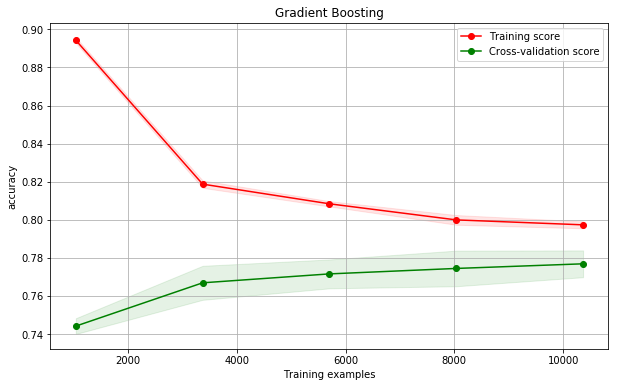

In [312]:
plot_learning_curve(gbc,'Gradient Boosting', X, y, cv=10);

plt.show()

### Bias-Variance Tradeoff for Gradient Boosting Classification

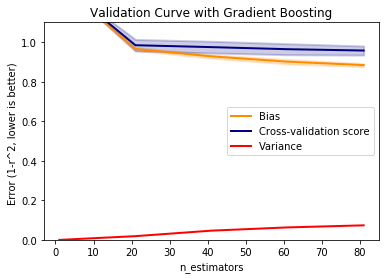

In [348]:
param_range = list(range(1,100, 20))
train_scores, test_scores = validation_curve(
    gbc, X, y, param_name="n_estimators", param_range=param_range,
    cv=4, scoring="r2", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("n_estimators")
plt.ylabel("Error (1-r^2, lower is better) ")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, 1-train_scores_mean, label="Bias",
             color="darkorange", lw=lw)
plt.fill_between(param_range, (1-train_scores_mean) - train_scores_std,
                 (1-train_scores_mean) + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, 1-test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, (1-test_scores_mean) - test_scores_std,
                 (1-test_scores_mean) + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, ((1-test_scores_mean)-(1-train_scores_mean)), label="Variance",
             color="red", lw=lw)
plt.legend(loc="best")
plt.show()

## Hyperparameter Tuning for Gradient Boosting Classification

In [314]:
# Choose the type of classifier. 
gbc_fit = GradientBoostingClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [100,200], 
              'criterion': ['friedman_mse','mse'],
              'min_samples_split': [2],
             }

# make_scorer returns a callable object that scores an estimator’s output.
#We are using accuracy_score for comparing different parameter combinations. 
acc_scorer = make_scorer(accuracy_score)

# Run the grid search 
grid_obj = GridSearchCV(gbc_fit, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set our classifier to the have the best combination of parameters
gbc_fit = grid_obj.best_estimator_

# Fit the selected classifier to the training data
gbc_fit.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [315]:
y_pred_gboost = gbc_fit.predict(X_test.values)
accuracy_score(y_test, y_pred_gboost)

0.77147816025455596

### Perform cross validation with 10 folds after optimization

In [316]:
run_kfold(gbc_fit)

Fold 1 accuracy: 0.7727666955767563
Fold 2 accuracy: 0.7803819444444444
Fold 3 accuracy: 0.7743055555555556
Fold 4 accuracy: 0.7925347222222222
Fold 5 accuracy: 0.7734375
Fold 6 accuracy: 0.7795138888888888
Fold 7 accuracy: 0.7690972222222222
Fold 8 accuracy: 0.7916666666666666
Fold 9 accuracy: 0.7916666666666666
Fold 10 accuracy: 0.7725694444444444
Mean Accuracy: 0.7797940306687867
Variance : 7.311969511234595e-05


#### From Hyperparameter tuning, we have found the optimal parameters showed above which gives us accuracy of 77.9% and variance of 7.32e^-05

#### Gradient Boosting
It works through Gradient Descent and Boosting. Gradient Descent iteratively finds the gradient at each point and moves to a new point until convergence at a minimum. Boosting applies a weak learning model to train the data such that the error can be minimized. Pros, works great for weak learning model, handles data of both numerical and categorical. Cons, its takes longer to train because of the fact that trees are built sequentially.

## Conclusion: 
After hyperparameter tuning all four classification methods. The highest accuracy is 78% using Gradient Boosting Classifaction. This is due to a weak learning model, since my model suffers high bias, which is plotted in the above bia-variance graph. Gradient Boosting would be a good method to solve this issue. 

# Step 5) Testing & Discussion

In [317]:
test_data = pd.read_csv('income-testing.csv')
test_data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


In [318]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null object
EducationLvl     12211 non-null int64
MaritalStatus    12211 non-null object
Occupation       11521 non-null object
Relationship     12211 non-null object
Race             12211 non-null object
Sex              12211 non-null object
CapitalGain      12211 non-null int64
CapitalLoss      12211 non-null int64
HoursPerWeek     12211 non-null int64
NativeCountry    11986 non-null object
IncomeBracket    12211 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


## Perform same data cleaning method we did for the training data

In [319]:
test_data = test_data.dropna(subset=['WorkClass','Occupation'],how = 'any')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 15 columns):
Age              11521 non-null int64
WorkClass        11521 non-null object
FinalWeight      11521 non-null int64
Education        11521 non-null object
EducationLvl     11521 non-null int64
MaritalStatus    11521 non-null object
Occupation       11521 non-null object
Relationship     11521 non-null object
Race             11521 non-null object
Sex              11521 non-null object
CapitalGain      11521 non-null int64
CapitalLoss      11521 non-null int64
HoursPerWeek     11521 non-null int64
NativeCountry    11307 non-null object
IncomeBracket    11521 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [320]:
test_data['NativeCountry'].fillna(value='United-States',inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11521 entries, 0 to 12210
Data columns (total 15 columns):
Age              11521 non-null int64
WorkClass        11521 non-null object
FinalWeight      11521 non-null int64
Education        11521 non-null object
EducationLvl     11521 non-null int64
MaritalStatus    11521 non-null object
Occupation       11521 non-null object
Relationship     11521 non-null object
Race             11521 non-null object
Sex              11521 non-null object
CapitalGain      11521 non-null int64
CapitalLoss      11521 non-null int64
HoursPerWeek     11521 non-null int64
NativeCountry    11521 non-null object
IncomeBracket    11521 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [321]:
test_data["NativeCountry"] = np.where(test_data["NativeCountry"].str.contains("United-States"), 1, 0)

In [322]:
test_data['Education'] = test_data['Education'].str.replace('Preschool', '0')
test_data['Education'] = test_data['Education'].str.replace('1st-4th', '1')
test_data['Education'] = test_data['Education'].str.replace('5th-6th', '2')
test_data['Education'] = test_data['Education'].str.replace('7th-8th', '3')
test_data['Education'] = test_data['Education'].str.replace('9th', '4')
test_data['Education'] = test_data['Education'].str.replace('10th', '5')
test_data['Education'] = test_data['Education'].str.replace('11th', '6')
test_data['Education'] = test_data['Education'].str.replace('12th', '7')
test_data['Education'] = test_data['Education'].str.replace('HS-grad', '8')
test_data['Education'] = test_data['Education'].str.replace('Some-college', '9')
test_data['Education'] = test_data['Education'].str.replace('Assoc-voc', '10')
test_data['Education'] = test_data['Education'].str.replace('Assoc-acdm', '11')
test_data['Education'] = test_data['Education'].str.replace('Bachelors', '12')
test_data['Education'] = test_data['Education'].str.replace('Masters', '13')
test_data['Education'] = test_data['Education'].str.replace('Prof-school', '14')
test_data['Education'] = test_data['Education'].str.replace('Doctorate', '15')
test_data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,9,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,1,50-100K
1,35,Private,341643,12,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,1,<50K
2,26,Private,40915,12,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,1,<50K
3,27,Federal-gov,257124,12,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,1,<50K
4,21,Private,256278,8,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,0,<50K


In [323]:
test_data['IncomeBracket'] = test_data['IncomeBracket'].str.replace('<50K', '1')
test_data['IncomeBracket'] = test_data['IncomeBracket'].str.replace('50-100K', '2')
test_data['IncomeBracket'] = test_data['IncomeBracket'].str.replace('>100K', '3')

In [324]:
def get_person(passenger):
    age,sex = passenger
    return 'Child' if age < 18 else sex
    return 'Retired' if age > 66 else sex
    
test_data['Person'] = test_data[['Age','Sex']].apply(get_person,axis=1)
test_data['Person'] = test_data[['Age','Sex']].apply(get_person,axis=1)
test_data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket,Person
0,57,Self-emp-not-inc,152030,9,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,1,2,Female
1,35,Private,341643,12,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,1,1,Male
2,26,Private,40915,12,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,1,1,Female
3,27,Federal-gov,257124,12,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,1,1,Male
4,21,Private,256278,8,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,0,1,Female


In [325]:
test_data["MaritalStatus"] = np.where(test_data["MaritalStatus"].str.contains("Married-civ-spouse"), 1, 0)

In [326]:
test_data.drop(['Relationship','Age','Education','FinalWeight','Sex','CapitalLoss'],axis=1,inplace = True)
test_data.head()

,WorkClass,EducationLvl,MaritalStatus,Occupation,Race,CapitalGain,HoursPerWeek,NativeCountry,IncomeBracket,Person
0,Self-emp-not-inc,10,1,Sales,White,0,25,1,2,Female
1,Private,13,0,Other-service,White,0,50,1,1,Male
2,Private,13,0,Other-service,White,0,25,1,1,Female
3,Federal-gov,13,0,Transport-moving,White,0,35,1,1,Male
4,Private,9,0,Other-service,Other,0,35,0,1,Female


In [327]:
dummies_work = pd.get_dummies(test_data['WorkClass'],prefix='Work')
dummies_occu = pd.get_dummies(test_data['Occupation'],prefix='Occu')
dummies_race = pd.get_dummies(test_data['Race'],prefix='Race')
dummies_person = pd.get_dummies(test_data['Person'],prefix='Person')

test_dummies_data = pd.concat([test_data, dummies_work, dummies_occu, dummies_race, dummies_person], axis=1)
test_dummies_data = test_dummies_data.drop(['WorkClass','Occupation','Race', 'Person'], axis=1)
test_dummies_data.head()

,EducationLvl,MaritalStatus,CapitalGain,HoursPerWeek,NativeCountry,IncomeBracket,Work_Federal-gov,Work_Local-gov,Work_Private,Work_Self-emp-inc,...,Occu_Tech-support,Occu_Transport-moving,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Person_Child,Person_Female,Person_Male
0,10,1,0,25,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,13,0,0,50,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,13,0,0,25,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,13,0,0,35,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,9,0,0,35,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [328]:
pca_test_data = test_dummies_data.drop(['IncomeBracket'],axis=1)

In [329]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(pca_test_data)

# Apply transform to both the training set and the test set.
test_img = scaler.transform(pca_test_data)

In [330]:
pca = PCA(.90)

In [331]:
pca.fit(test_img)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [332]:
test_img_data = pca.transform(train_img)

In [333]:
testReducedDF=pd.DataFrame(np.concatenate([test_img_data], axis=1))
testReducedDF.shape

(11521, 25)

In [334]:
X_new_test = testReducedDF
y_new_test = test_dummies_data.IncomeBracket

## Use Gradient Boosting Classfication to predict the IncomeBracket value and check our Accuracy

In [337]:
y_pred_gboost = gbc_fit.predict(X_new_test.values)
accuracy_score(y_new_test, y_pred_gboost)

0.80296849231837519

#### Discussion: 
The accuracy for the testing data is 80%. My model have similar accuracy score for both the training set and the testing set. With the testing set 2% higher than the training set. The accuracy can be futher increased through feature selection. From data exploration, I can add another feature defining the work class to be individual work or not, since most people working individually have higher income. Also, Gradient Boosting Classification works best in my case since my data have high bias, which mean it is underfitting. You can clearly see this through the bia-variance plot from earlier. This is because my model is too simple with regards to the data it is trying to model. 